#### **Importing the required libraries**


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from collections import Counter
print(tf.__version__)

2.11.0


In [2]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### **Reading the Data**

In [ ]:
data = pd.read_csv('creditcard.csv')


In [ ]:
data.head()
data.isnull().sum()
data.shape
data.info()
data['Class'].value_counts()

In [21]:
col_del = ['Time' ,'V5', 'V6', 'V7', 'V8', 'V9','V13','V15', 'V16',  'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
tr_data = data.drop(col_del,axis =1)
tr_data.shape

(284807, 10)

In [22]:
X = tr_data.drop(['Class'], axis = 'columns')
Label_Data = tr_data['Class']
X.shape

(284807, 9)

In [23]:
# Generate and plot imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(tr_data['Class'])
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(tr_data['Class'] == label)[0]

Counter({0: 284315, 1: 492})


#### **Oversampling the Dataset Using SMOTE**

In [24]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_r, y = oversample.fit_resample(X, tr_data['Class'])
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]

Counter({0: 284315, 1: 284315})


In [25]:
# from sklearn.preprocessing import StandardScaler
## Standardizing the data
X_r2 = StandardScaler().fit_transform(X_r)

##### **Splitting the data into train and test set**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_r2, y, test_size = 0.3, random_state = 0, stratify = y)

In [28]:
X_train.shape, X_test.shape

((398041, 9), (170589, 9))

#### **Random Under Sampling**

In [38]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]
non_fraud.shape, fraud.shape
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

In [ ]:
data = fraud.append(non_fraud, ignore_index=True)
data
data['Class'].value_counts()
X = data.drop('Class', axis = 1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
X_train.shape

In [29]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train.shape, X_test.shape

((398041, 9, 1), (170589, 9, 1))

### **Build CNN**

In [30]:
epochs = 20
model = Sequential()
# model.add(Conv2D(32, (2,2), activation='relu', input_shape = X_train[0].shape))
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
# model.add(Conv2D(64, (2,2), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
# model.add(Dense(120, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [32]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=32, verbose=1)

Epoch 1/20
12439/12439 [==============================] - 88s 7ms/step - loss: 0.1575 - accuracy: 0.9399 - val_loss: 0.1279 - val_accuracy: 0.9485
Epoch 2/20
12439/12439 [==============================] - 84s 7ms/step - loss: 0.1385 - accuracy: 0.9446 - val_loss: 0.1082 - val_accuracy: 0.9554
Epoch 3/20
12439/12439 [==============================] - 99s 8ms/step - loss: 0.1258 - accuracy: 0.9495 - val_loss: 0.0956 - val_accuracy: 0.9637
Epoch 4/20
12439/12439 [==============================] - 125s 10ms/step - loss: 0.1169 - accuracy: 0.9533 - val_loss: 0.0862 - val_accuracy: 0.9664
Epoch 5/20
12439/12439 [==============================] - 158s 13ms/step - loss: 0.1095 - accuracy: 0.9560 - val_loss: 0.0843 - val_accuracy: 0.9700
Epoch 6/20
12439/12439 [==============================] - 230s 18ms/step - loss: 0.1042 - accuracy: 0.9581 - val_loss: 0.0730 - val_accuracy: 0.9733
Epoch 7/20
12439/12439 [==============================] - 165s 13ms/step - loss: 0.0997 - accuracy: 0.9597 - val

### **Plotting**

In [35]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

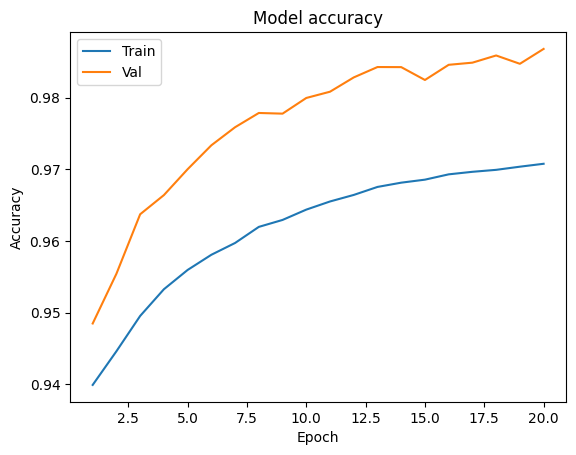

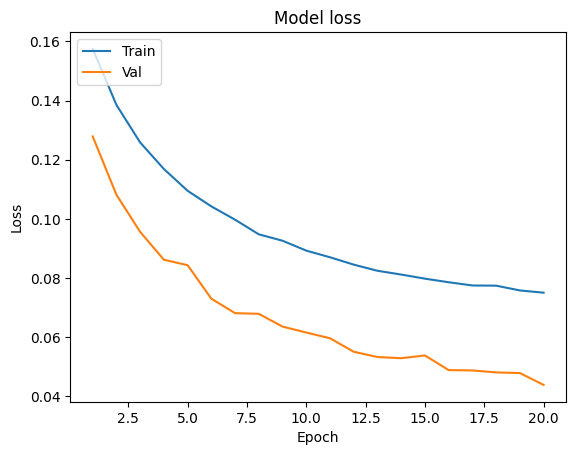

In [36]:
plot_learningCurve(history, epochs)

### **Adding Maxpool**

Epoch 1/50
12439/12439 [==============================] - 77s 6ms/step - loss: 0.3039 - accuracy: 0.8804 - val_loss: 0.1711 - val_accuracy: 0.9319
Epoch 2/50
12439/12439 [==============================] - 64s 5ms/step - loss: 0.2068 - accuracy: 0.9214 - val_loss: 0.1560 - val_accuracy: 0.9344
Epoch 3/50
12439/12439 [==============================] - 66s 5ms/step - loss: 0.1890 - accuracy: 0.9265 - val_loss: 0.1434 - val_accuracy: 0.9358
Epoch 4/50
12439/12439 [==============================] - 77s 6ms/step - loss: 0.1795 - accuracy: 0.9291 - val_loss: 0.1374 - val_accuracy: 0.9383
Epoch 5/50
12439/12439 [==============================] - 74s 6ms/step - loss: 0.1735 - accuracy: 0.9308 - val_loss: 0.1318 - val_accuracy: 0.9394
Epoch 6/50
12439/12439 [==============================] - 67s 5ms/step - loss: 0.1680 - accuracy: 0.9323 - val_loss: 0.1267 - val_accuracy: 0.9410
Epoch 7/50
12439/12439 [==============================] - 65s 5ms/step - loss: 0.1638 - accuracy: 0.9337 - val_loss: 0

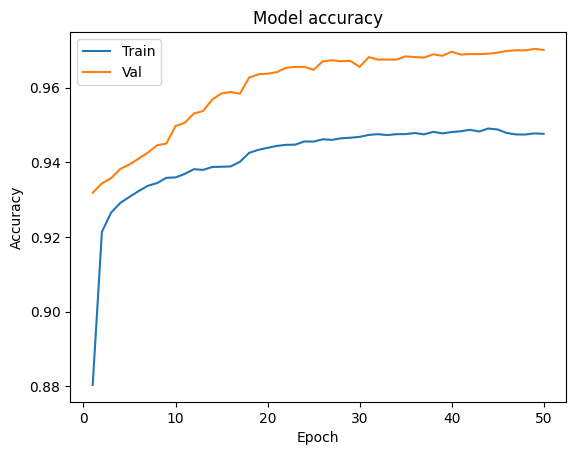

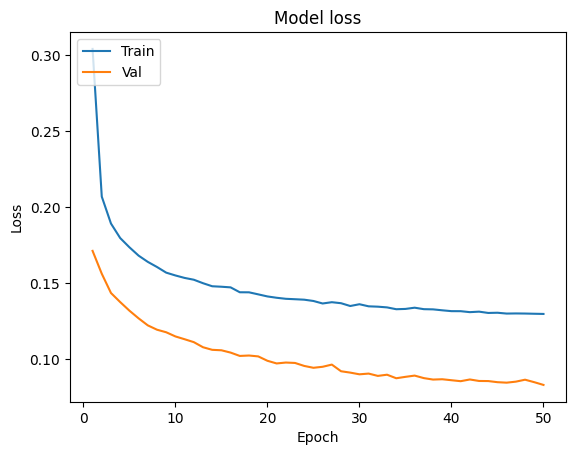

In [38]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy',])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=32, verbose=1)
plot_learningCurve(history, epochs)

### **Finding the Metrices**

In [39]:
# Making the Prediction and Evaluating the model
# Predicting the Test set result
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

5331/5331 [==============================] - 12s 2ms/step


In [40]:
# calculate accuracy,f1_score,precision,recall
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
# y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

Accuracy:  0.9701328925077233
F1 Score:  0.9698436843382479
Precision:  0.9793208142578802
Recall:  0.9605482214458226
Classification Report:                precision    recall  f1-score   support

           0       0.96      0.98      0.97     85295
           1       0.98      0.96      0.97     85294

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589

Confusion Matrix:  [[83565  1730]
 [ 3365 81929]]
